In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

In [3]:
X_train.shape , y_train.shape, X_test.shape , y_test.shape  

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0] 

np.uint8(9)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

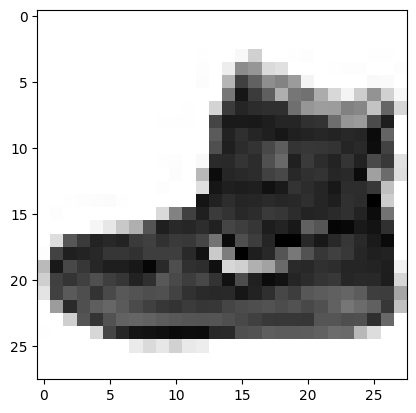

In [7]:
plt.imshow(X_train[0], cmap='Greys')  

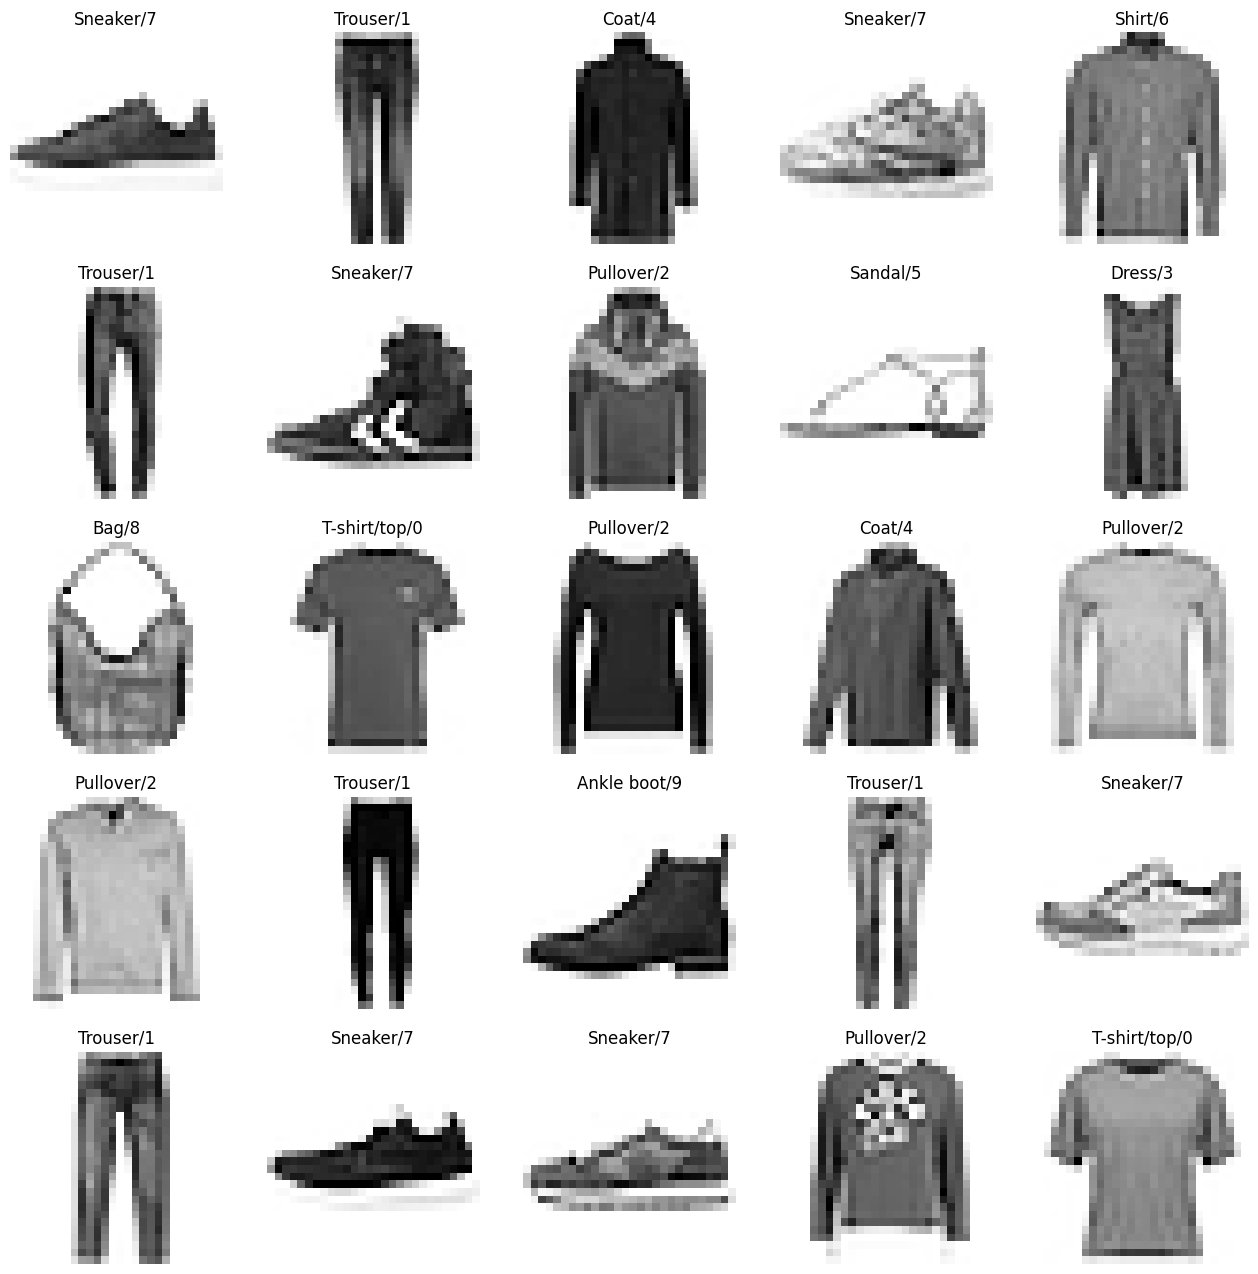

In [9]:
# Create a large figure for displaying the images
plt.figure(figsize = (16,16))

# Initialize a counter (j) to arrange images in a 5x5 grid
j = 1

# Loop through a random sample of 25 image indices from the training data (0 to 1000)
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)  # Create a subplot in a 5x5 grid (5 rows, 5 columns)
    j += 1  # Move to the next subplot
    plt.imshow(X_train[i], cmap='Greys')  # Display the image with 'Greys' colormap (grayscale)
    plt.axis('off')  # Turn off axis labels (for cleaner image display)
    plt.title('{}/{}'.format(class_names[y_train[i]], y_train[i]))  # Title shows the predicted label and true label

In [10]:
X_train.shape 

(60000, 28, 28)

In [11]:
X_train.ndim 

3

In [12]:
# Add an extra dimension to the training and test data arrays, indicating the channel (for grayscale images)
# X_train and X_test initially have the shape (num_samples, height, width), and we are adding a channel dimension at the end
X_train = np.expand_dims(X_train, -1)  # Resulting shape: (num_samples, height, width, 1)
X_test = np.expand_dims(X_test, -1)    # Resulting shape: (num_samples, height, width, 1)


In [13]:
X_train.ndim 

4

In [14]:
# Normalize the pixel values to the range [0, 1] by dividing by 255
# The original pixel values range from 0 to 255, and dividing by 255 scales them down to the [0, 1] range
X_train = X_train / 255  # Normalize the training data
X_test = X_test / 255    # Normalize the test data


In [15]:
from sklearn.model_selection import train_test_split  # Import train_test_split function

# Split the dataset into training and validation sets using the train_test_split function from scikit-learn
# 80% of the data is used for training, and 20% is set aside for validation
# random_state is set for reproducibility, ensuring the split is the same each time the code is run

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train,        # Features for training data
    y_train,        # Target labels for training data
    test_size=0.2,  # 20% of the data will be used for validation
    random_state=2020  # Ensures reproducibility of the split
)


In [16]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape 

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [17]:
from keras import models, layers

# Define a Convolutional Neural Network (CNN) model using Keras Sequential API
cnn_model = models.Sequential([
    # 2D convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function
    # The input shape is (28, 28, 1), which is a grayscale image (28x28 pixels)
    layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',
                  activation='relu', input_shape=(28, 28, 1)),  # Example input shape for MNIST
    
    # Max pooling layer with a pool size of 2x2 to reduce the spatial dimensions
    layers.MaxPooling2D(pool_size=(2,2)),
    
    # Flatten layer to convert the 2D matrix into a 1D vector for the fully connected layers
    layers.Flatten(),
    
    # Fully connected dense layer with 128 units and ReLU activation function
    layers.Dense(units=128, activation='relu'),
    
    # Output layer with 10 units (one for each class in the MNIST dataset) and softmax activation
    # Softmax converts the output to probabilities summing to 1
    layers.Dense(units=10, activation='softmax')
])


c:\python 39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn_model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the CNN model
cnn_model.compile(
    optimizer='adam',  # Adam optimizer is used for gradient descent. It adapts the learning rate during training.
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification problems.
    # Sparse categorical crossentropy is used when the target labels are integers, not one-hot encoded.
    metrics=['accuracy']  # List of metrics to evaluate the model during training. Here, we use accuracy.
)

In [ ]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation)) 

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6968 - loss: 0.9539 - val_accuracy: 0.8437 - val_loss: 0.4434
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8605 - loss: 0.4006 - val_accuracy: 0.8713 - val_loss: 0.3739
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8758 - loss: 0.3516 - val_accuracy: 0.8764 - val_loss: 0.3461
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8870 - loss: 0.3170 - val_accuracy: 0.8855 - val_loss: 0.3251
Epoch 5/10
 5/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8899 - loss: 0.2881

In [21]:
# Make predictions on the test dataset
y_pred = cnn_model.predict(X_test)  # Use the trained CNN model to predict the class labels for the test data.

# Round the predicted values to two decimal places
y_pred.round(2)  # Rounds the predicted probabilities to two decimal places for easier interpretation.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.11, 0.07, 0.  ]], dtype=float32)

In [22]:
y_test 

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
cnn_model.evaluate(X_test, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9009 - loss: 0.2767


[0.2727466821670532, 0.9004999995231628]

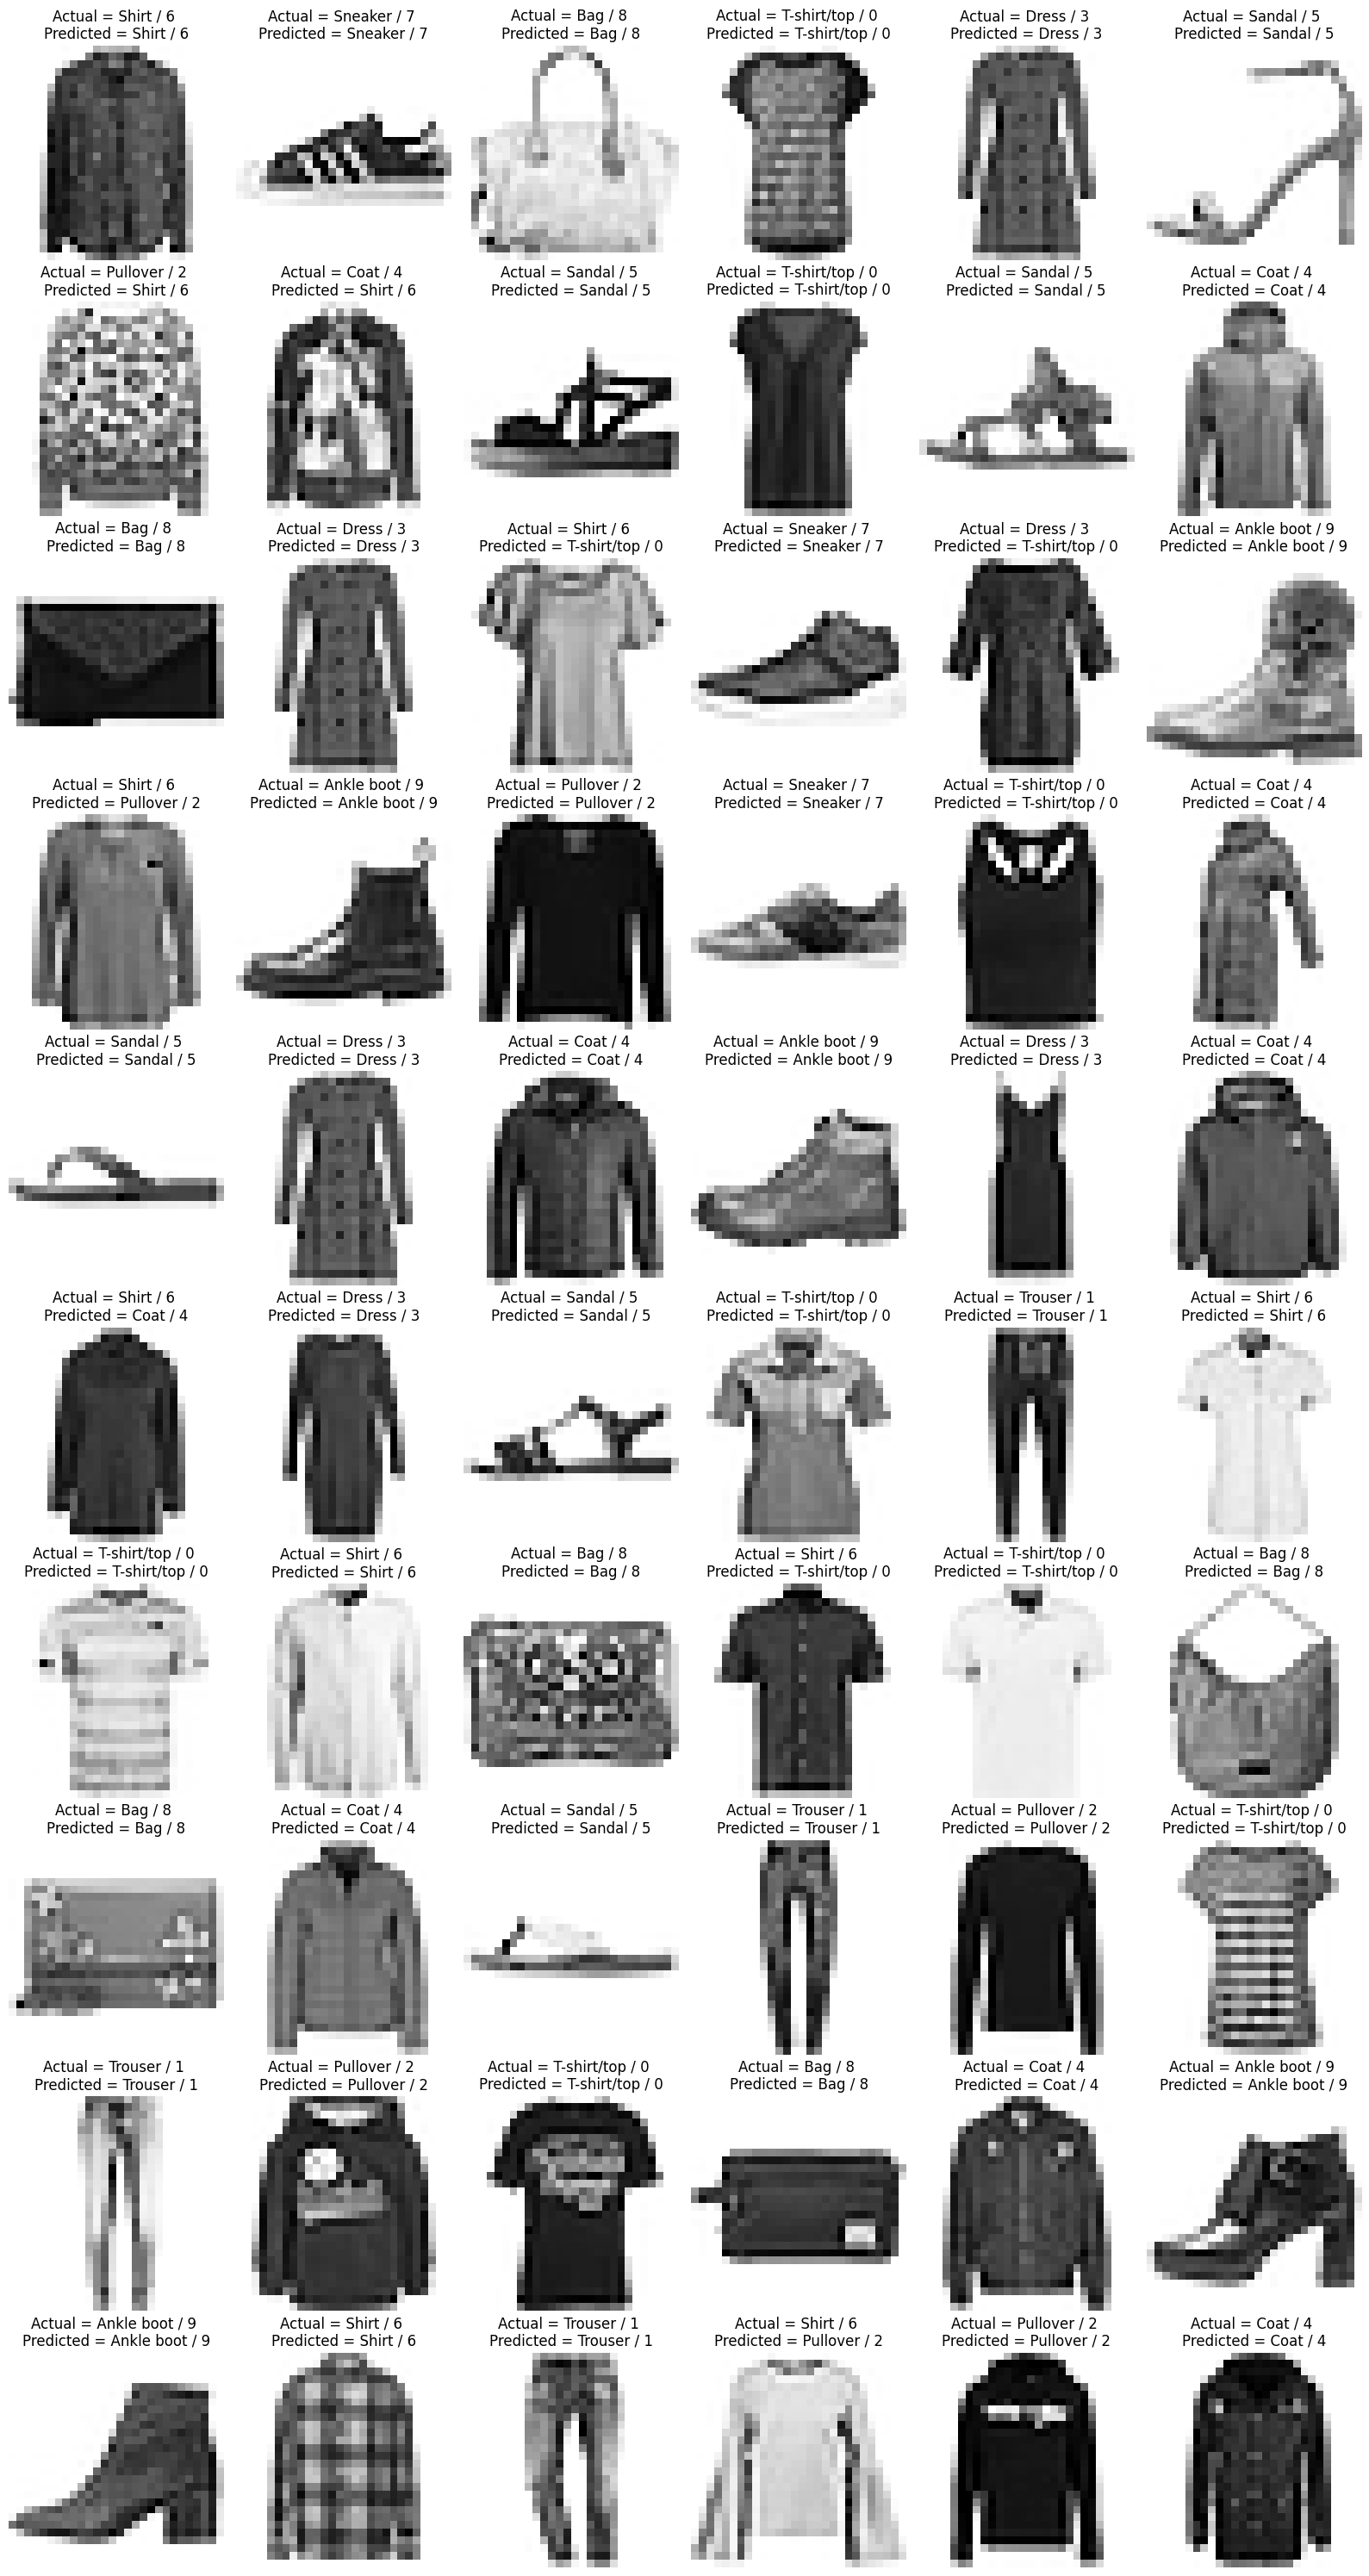

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create a large figure for plotting
plt.figure(figsize=(16, 30))

# Initialize a counter for the subplot positioning
j = 1

# Randomly select 60 samples from the test set
for i in np.random.randint(0, 1000, 60):  # np.random.randint generates random integers for indexing
    # Create a subplot for each selected sample
    plt.subplot(10, 6, j)  # 10 rows and 6 columns for subplots, j is the current subplot index
    j += 1  # Increment the subplot index
    # Reshape each image from the test set to its original 28x28 dimensions and display it
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')  # cmap='Greys' ensures the image is shown in grayscale
    # Set the title to display actual and predicted class labels
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(
        class_names[y_test[i]], y_test[i],  # Actual class name and label
        class_names[np.argmax(y_pred[i])], np.argmax(y_pred[i])  # Predicted class name and label
    ))
    plt.axis('off')  # Hide axis lines and labels for a cleaner image

# Adjust layout for proper spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


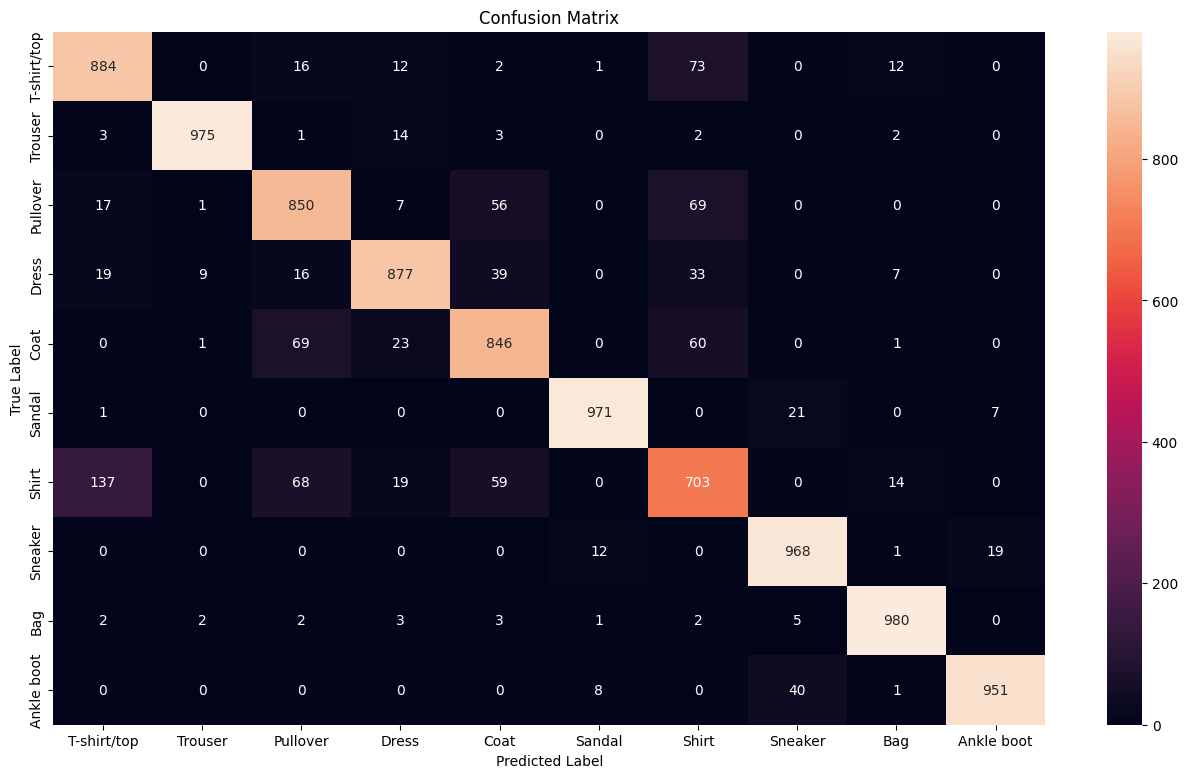

In [25]:
from sklearn.metrics import confusion_matrix  # Import function to compute confusion matrix
plt.figure(figsize=(16,9))                    # Create a figure for the heatmap with specified size

# Convert predicted probabilities to class labels by taking the index with highest probability
y_pred_labels = [np.argmax(label) for label in y_pred]

# Compute confusion matrix: rows = true labels, columns = predicted labels
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix as a heatmap
sns.heatmap(
    cm,
    annot=True,             # Annotate cells with counts
    fmt='d',                # Format annotations as integers
    xticklabels=class_names,  # Label columns with class names
    yticklabels=class_names   # Label rows with class names
)
plt.xlabel('Predicted Label')  # Label for x-axis
plt.ylabel('True Label')       # Label for y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()                     # Render the heatmap


In [26]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_names)
print(cr) 

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.85      0.84      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.84      0.85      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.75      0.70      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

